<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg" />
</center> 
     
## <center>  [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

#### <center> Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko) 

# <center>Assignment #2. Fall 2019
## <center> Part 2. Gradient boosting

**In this assignment, you're asked to beat a baseline in the ["Flight delays" competition](https://www.kaggle.com/c/flight-delays-fall-2018).**

This time we decided to share a pretty decent CatBoost baseline, you'll have to improve the provided solution.

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/video](https://mlcourse.ai/video) 
 6. mlcourse.ai tutorials on [categorical feature encoding](https://www.kaggle.com/waydeherman/tutorial-categorical-encoding) (by Wayde Herman) and [CatBoost](https://www.kaggle.com/mitribunskiy/tutorial-catboost-overview) (by Mikhail Tribunskiy)
 7. Last but not the least: [Public Kernels](https://www.kaggle.com/c/flight-delays-fall-2018/notebooks) in this competition

### Your task is to:
 1. beat **"A2 baseline (10 credits)"** on Public LB (**0.75914** LB score)
 2. rename your [team](https://www.kaggle.com/c/flight-delays-fall-2018/team) in full accordance with A1 and the [course rating](https://docs.google.com/spreadsheets/d/15e1K0tg5ponA5R6YQkZfihrShTDLAKf5qeKaoVCiuhQ/) (to appear on 16.09.2019)
 
This task is intended to be relatively easy. Here you are not required to upload your reproducible solution.
 
### <center> Deadline for A2: 2019 October 6, 20:59 CET (London time)

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

**Read the data**

In [69]:
train_df = pd.read_csv('flight_delays_train.csv')
test_df = pd.read_csv('flight_delays_test.csv')

In [ ]:
# Month         - месяц
# DayofMonth    - день месяца
# DayOfWeek     - день недели
# DepTime       - время отправления
# UniqueCarrier - код карьеры компании
# Origin        - происхождение рейса
# Dest          - пункт назначения рейса
# Distance      - расстояние между аэропортами городов
# dep_delayed_15min - цель

In [3]:
train_df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


In [11]:
test_df['dep_delayed_15min'] = 'O'

In [13]:
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-7,c-25,c-3,615,YV,MRY,PHX,598,O
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235,O
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577,O
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377,O
4,c-6,c-6,c-3,1505,UA,ORD,STL,258,O


In [14]:
data = pd.concat([train_df,test_df])


In [15]:
data.shape

(200000, 9)

In [16]:
data['flight'] = data['Origin'] + '-->' + data['Dest']

In [17]:
data.shape

(200000, 10)

In [18]:
len(data['UniqueCarrier'].value_counts())

23

In [19]:
data['Hour'] =  data.apply(lambda x : x['DepTime']//100, axis=1)


In [20]:
data.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min', 'flight', 'Hour'],
      dtype='object')

In [21]:
Month =  pd.get_dummies(data['Month'], prefix='Month_')
DayofMonth =  pd.get_dummies(data['DayofMonth'], prefix='DayofMonth_')
DayOfWeek =  pd.get_dummies(data['DayOfWeek'], prefix='DayOfWeek_')
UniqueCarrier =  pd.get_dummies(data['UniqueCarrier'], prefix='UniqueCarrier_')
flight =  pd.get_dummies(data['flight'], prefix='flight_')
Hour =  pd.get_dummies(data['Hour'], prefix='Hour')

In [31]:
data2 = pd.concat([data[['Distance','dep_delayed_15min']], Month, DayofMonth, DayOfWeek, UniqueCarrier, flight, Hour], axis=1)

In [32]:

data2.shape

(200000, 5149)

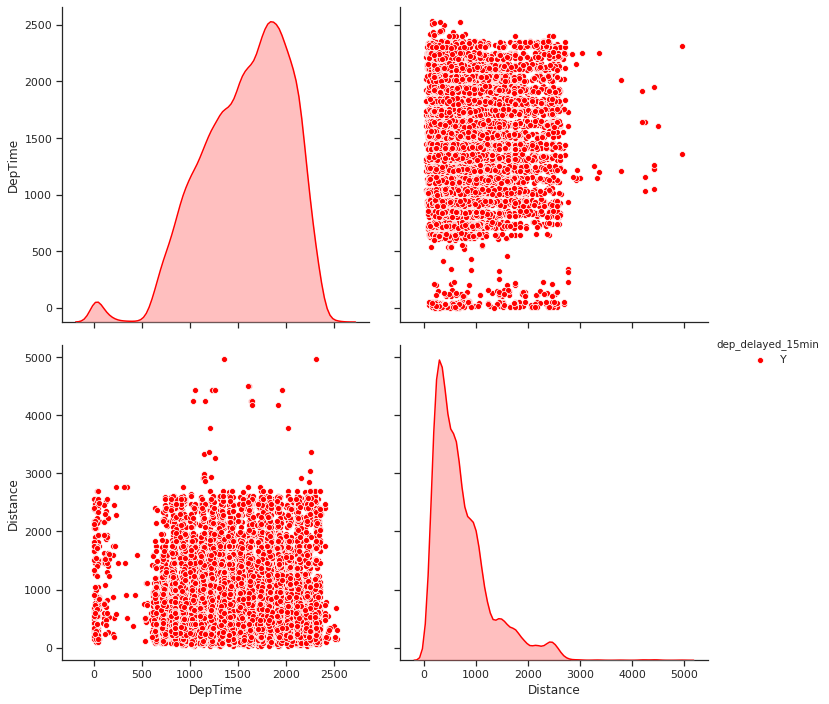

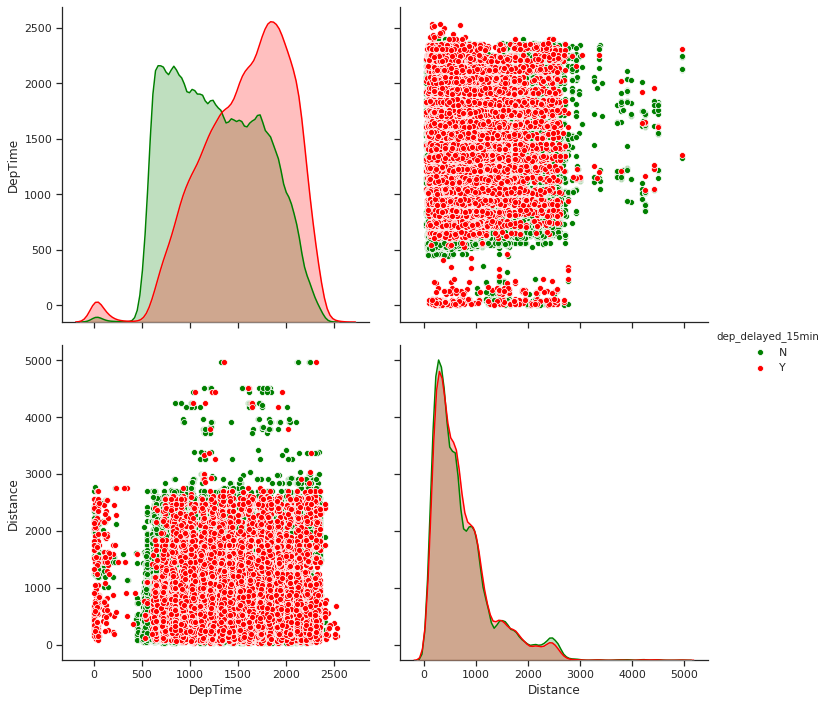

In [72]:
sns.pairplot(trainDelay, height=5, hue='dep_delayed_15min', palette={'Y':'red', 'N':'green'})
sns.pairplot(train_df, height=5, hue='dep_delayed_15min', palette={'Y':'red', 'N':'green'})

In [13]:
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


**Create only one feature - “flight” (this you need to improve - add more features)**

**Создайте только одну функцию - "полет" (это вам нужно улучшить-добавить больше возможностей)**

In [70]:
train_df['flight'] = train_df['Origin'] + '-->' + train_df['Dest']
test_df['flight'] = test_df['Origin'] + '-->' + test_df['Dest']

**Remember indexes of categorical features (to be passed to CatBoost)**

**Запомнить индексы категориальных признаков (для передачи в CatBoost)**

In [71]:
categ_feat_idx = np.where(train_df.drop('dep_delayed_15min', axis=1).dtypes == 'object')[0]
categ_feat_idx

array([0, 1, 2, 4, 5, 6, 8])

**Allocate a hold-out set (a.k.a. a validation set) to validate the model**

**Выделите проверочный набор (он же проверочный набор) для проверки модели**

In [72]:
X_train = train_df.drop('dep_delayed_15min', axis=1).values
y_train = train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test_df.values

In [48]:
X_train = data2[data2['dep_delayed_15min'] != 'O']
test = data2[data2['dep_delayed_15min'] == 'O']

y_train = X_train['dep_delayed_15min'].apply(lambda x: 1 if x=='Y' else 0)

In [49]:
del test['dep_delayed_15min']
del X_train['dep_delayed_15min']


In [50]:
test.head(1)

,Distance,Month__c-1,Month__c-10,Month__c-11,Month__c-12,Month__c-2,Month__c-3,Month__c-4,Month__c-5,Month__c-6,...,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Hour_24,Hour_25
0,598,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:

y_train.value_counts()

0    80956
1    19044
Name: dep_delayed_15min, dtype: int64

In [73]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, 
                                                                test_size=0.3, 
                                                                random_state=17)

**Train Catboost with default arguments, passing only the indexes of categorical features.**

In [99]:
ctb = CatBoostClassifier(random_seed=17,iterations=10000, eval_metric='F1')

In [96]:
%%time
ctb.fit(X_train_part, y_train_part, cat_features=categ_feat_idx, silent=True, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 1h 2min 3s, sys: 4min 58s, total: 1h 7min 2s
Wall time: 7min 51s


In [104]:
ctb_valid_pred = ctb.predict_proba(X_valid)[:, 1]

**We got some 0.756 ROC AUC on the hold-out set.**

In [105]:
roc_auc_score(y_valid, ctb_valid_pred)

0.8816057382327549

0.760394780055024

**Train on the whole train set, make prediction on the test set. We got ~0.734 in the competition - "Catboost starter" baseline**

In [100]:
%%time
ctb.fit(X_train, y_train,
        cat_features=categ_feat_idx,silent=True, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 1h 21min 58s, sys: 6min 5s, total: 1h 28min 3s
Wall time: 10min 6s


In [101]:
ctb_test_pred = ctb.predict_proba(X_test)[:, 1]

In [102]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    sample_sub = pd.read_csv('sample_submission.csv', index_col='id')
    sample_sub['dep_delayed_15min'] = ctb_test_pred
    sample_sub.to_csv('ctb_pred.csv')

In [103]:
!head ctb_pred.csv

id,dep_delayed_15min
0,0.03587400559485063
1,0.05844399328630069
2,0.04333411826867901
3,0.29329507453340625
4,0.2915271544438874
5,0.09185805870178486
6,0.05415573499838375
7,0.220088673606799
8,0.11062803781834729


Now's your turn! Go and improve the model to beat **"A2 baseline (10 credits)"** - **0.75914** LB score. It's crucial to come up with some good features. 

For discussions, stick to the **#a2_kaggle_fall2019** thread in the **mlcourse_ai_news** [ODS Slack](http://opendatascience.slack.com) channel. Serhii Romanenko (@serhii_romanenko) will be there to help. 

Welcome to Kaggle!

<img src='https://habrastorage.org/webt/fs/42/ms/fs42ms0r7qsoj-da4x7yfntwrbq.jpeg' width=50%>

*from the ["Nerd Laughing Loud"](https://www.kaggle.com/general/76963) thread.*